# Laboratorio 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

alt.themes.enable('opaque')
%matplotlib inline

En este laboratorio utilizaremos los mismos datos de diabetes vistos en la clase

In [2]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes = pd.concat([diabetes_X, diabetes_y], axis=1)
diabetes.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


## Pregunta 1

(1 pto)

* ¿Por qué la columna de sexo tiene esos valores?
* ¿Cuál es la columna a predecir?
* ¿Crees que es necesario escalar o transformar los datos antes de comenzar el modelamiento?

__Respuesta:__

* ```Esto es porque la columna fue centrada y escalada por la desviación estandar multiplicada por la cantidad de muestras. En particular, podemos ver que 'sex' toma dos valores (-0.044 y 0.050), que se explica por los valores que puede tomar (F y M).```
* ```La columna target.```
* ```Si, pues estos valores poseen niveles de magnitud distintos, además normalizar los resultados permite que los algoritmos funcionen mejor.```

## Pregunta 2

(1 pto)

Realiza dos regresiones lineales con todas las _features_, el primer caso incluyendo intercepto y el segundo sin intercepto. Luego obtén la predicción para así calcular el error cuadrático medio y coeficiente de determinación de cada uno de ellos.

In [3]:
from sklearn.linear_model import LinearRegression

regr_with_incerpet = LinearRegression(fit_intercept=True).fit(diabetes_X, diabetes_y)

In [4]:
diabetes_y_pred_with_intercept = regr_with_incerpet.predict(diabetes_X)

In [5]:
# Coeficientes
print(f"Coefficients: \n{regr_with_incerpet.coef_}\n")
# Intercepto
print(f"Intercept: \n{regr_with_incerpet.intercept_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_with_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_with_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Intercept: 
152.1334841628965

Mean squared error: 2859.69

Coefficient of determination: 0.52


In [6]:
regr_without_incerpet = LinearRegression(fit_intercept=False).fit(diabetes_X, diabetes_y)

In [7]:
diabetes_y_pred_without_intercept = regr_without_incerpet.predict(diabetes_X)

In [8]:
# Coeficientes
print(f"Coefficients: \n{regr_without_incerpet.coef_}\n")
# Intercepto
print(f"Intercept: \n{regr_without_incerpet.intercept_}\n")
# Error cuadrático medio
print(f"Mean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_without_intercept):.2f}\n")
# Coeficiente de determinación
print(f"Coefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_without_intercept):.2f}")

Coefficients: 
[ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]

Intercept: 
0.0

Mean squared error: 26004.29

Coefficient of determination: -3.39


**Pregunta: ¿Qué tan bueno fue el ajuste del modelo?**

__Respuesta:__
```La regresión lineal aumentó su eficacia. Esto se puede ver en la disminución considerable del error cruadratico medio, así como en el coeficiente de determinación. Sin embargo, un coeficiente de '0.5' no es suficeiente para considerar al modelo un buen ajuste.```

## Pregunta 3

(1 pto)

Realizar multiples regresiones lineales utilizando una sola _feature_ a la vez. 

En cada iteración:

- Crea un arreglo `X`con solo una feature filtrando `X`.
- Crea un modelo de regresión lineal con intercepto.
- Ajusta el modelo anterior.
- Genera una predicción con el modelo.
- Calcula e imprime las métricas de la pregunta anterior.

In [9]:
for col in diabetes_X.columns:
    X_i = np.array(diabetes_X[col]).reshape(-1,1)
    regr_i = LinearRegression(fit_intercept=True).fit(X_i, diabetes_y)
    diabetes_y_pred_i = regr_i.predict(X_i)
    print(f"Feature: {col}")
    print(f"\tCoefficients: {regr_i.coef_}")
    print(f"\tIntercept: {regr_i.intercept_}")
    print(f"\tMean squared error: {mean_squared_error(diabetes_y, diabetes_y_pred_i):.2f}")
    print(f"\tCoefficient of determination: {r2_score(diabetes_y, diabetes_y_pred_i):.2f}\n")

Feature: age
	Coefficients: [304.18307453]
	Intercept: 152.13348416289605
	Mean squared error: 5720.55
	Coefficient of determination: 0.04

Feature: sex
	Coefficients: [69.71535568]
	Intercept: 152.13348416289594
	Mean squared error: 5918.89
	Coefficient of determination: 0.00

Feature: bmi
	Coefficients: [949.43526038]
	Intercept: 152.1334841628967
	Mean squared error: 3890.46
	Coefficient of determination: 0.34

Feature: bp
	Coefficients: [714.7416437]
	Intercept: 152.13348416289585
	Mean squared error: 4774.10
	Coefficient of determination: 0.19

Feature: s1
	Coefficients: [343.25445189]
	Intercept: 152.13348416289597
	Mean squared error: 5663.32
	Coefficient of determination: 0.04

Feature: s2
	Coefficients: [281.78459335]
	Intercept: 152.1334841628959
	Mean squared error: 5750.24
	Coefficient of determination: 0.03

Feature: s3
	Coefficients: [-639.14527932]
	Intercept: 152.13348416289566
	Mean squared error: 5005.66
	Coefficient of determination: 0.16

Feature: s4
	Coefficients: 

**Pregunta: Si tuvieras que escoger una sola _feauture_, ¿Cuál sería? ¿Por qué?**

**Respuesta:** ```Escogería 'body mass index', esto dado porque su coeficiente de determinación es mayor.```

## Ejercicio 4

(1 pto)

Con la feature escogida en el ejercicio 3 realiza el siguiente gráfico:

- Scatter Plot
- Eje X: Valores de la feature escogida.
- Eje Y: Valores de la columna a predecir (target).
- En color rojo dibuja la recta correspondiente a la regresión lineal (utilizando `intercept_`y `coefs_`).
- Coloca un título adecuado, nombre de los ejes, etc.

Puedes utilizar `matplotlib` o `altair`, el que prefieras.

In [10]:
X_i = np.array(diabetes_X['bmi']).reshape(-1,1)
regr = linear_model.LinearRegression(fit_intercept=True).fit(X_i, diabetes_y)

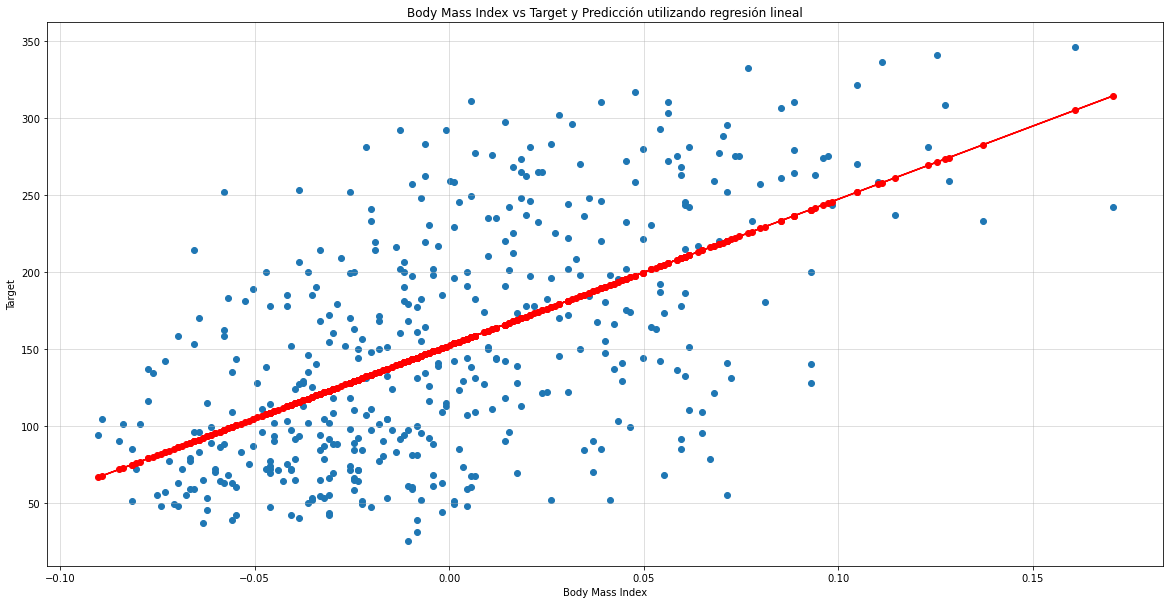

In [11]:
fig = plt.figure(figsize=(20, 10))

plt.scatter(X_i, diabetes_y)
plt.plot(X_i, regr.intercept_ + X_i * regr.coef_, marker='o', color='red')
plt.grid(alpha=0.5)
plt.xlabel('Body Mass Index')
plt.ylabel('Target')
plt.title("Body Mass Index vs Target y Predicción utilizando regresión lineal")

plt.show()